# Predicting the Sunshine Hours Tomorrow

A regression task on the weather prediction dataset



In [ ]:
import pandas as pd

df = pd.read_csv("https://zenodo.org/record/5071376/files/weather_prediction_dataset.csv")

df.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,...,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.00000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782,4.890531,0.656505,1.016935,1.465487,0.136442,5.753229,12.174849,16.629091,5.303229,3.395293,9.986316,0.817882,1.015299,1.190903,0.236888,4.744444,10.70353,6.397099,14.798604,5.405036,4.256924,10.924576,0.759023,1.263432,0.175881,4.815736,9.800629,5.924056,13.671346,...,11.033443,4.669376,0.651522,1.016451,1.711773,0.150733,16.035468,11.615900,20.455337,3.520799,0.735025,1.015247,1.568177,7.162397,16.059579,11.170115,21.103229,5.446907,0.853952,1.693919,0.541475,4.891078,-4.626327,-6.884319,-2.352244,5.245758,1.011074,0.149039,5.101478,8.049808,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,8.721323,2.386442,0.149603,0.007795,0.977986,0.408932,4.475439,8.744451,9.981538,2.279416,1.422020,3.582408,0.097465,0.009861,0.870267,0.459495,3.995637,6.19077,5.639597,7.210740,2.194769,1.775045,4.031649,0.132420,0.936443,0.459725,4.426682,7.854752,6.934514,9.038833,...,9.002142,2.651377,0.149114,0.006809,0.941671,0.772949,6.476893,6.373871,6.974910,2.198344,0.121004,0.006743,0.878505,4.015933,6.941017,6.424980,7.626300,2.437457,0.174900,0.898277,0.771348,4.470904,6.987080,7.120333,6.972886,3.362460,0.033838,0.345369,4.943148,7.829552,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000

In [ ]:
df.shape

(3654, 165)

In [ ]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [ ]:
print(set({ "_".join(x.split("_")[1:]) for x in df.columns if x not in ["MONTH", "DATE"]  }))

{'global_radiation', 'sunshine', 'BILT_temp_max', 'pressure', 'temp_min', 'temp_mean', 'BILT_cloud_cover', 'BILT_global_radiation', 'BILT_temp_min', 'temp_max', 'BILT_wind_gust', 'BILT_sunshine', 'cloud_cover', 'BILT_temp_mean', 'wind_gust', 'humidity', 'wind_speed', 'BILT_wind_speed', 'BILT_pressure', 'BILT_precipitation', 'BILT_humidity', 'precipitation'}


In [ ]:
nr_rows = 365*3

X_data = df.loc[:nr_rows].drop(columns=["DATE", "MONTH"])

In [ ]:
X_data.shape

(1096, 163)

In [ ]:
print([ item for item in df.columns if "BASEL" in item])

['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']


In [ ]:
y_data = df.loc[1:(nr_rows+1)]["BASEL_sunshine"]

In [ ]:
y_data.dtype

dtype('float64')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_not_train, y_train, y_not_train = train_test_split(X_data, y_data, test_size=.3, random_state=20211013)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_not_train, y_not_train, test_size=.5, random_state=20211014)


In [ ]:
print(X_train.shape)

(767, 163)


In [ ]:
print(X_test.shape, X_val.shape)

(165, 163) (164, 163)


In [ ]:
from tensorflow import keras

def create_nn():

  inputs = keras.Input(shape=(X_data.shape[1],), name="input")

  dense1 = keras.layers.Dense(100, 'relu', name="dense1")(inputs)
  dense2 = keras.layers.Dense(50, 'relu', name="dense2")(dense1)

  outputs = keras.layers.Dense(1)(dense2)

  return keras.Model(inputs=inputs, outputs=outputs, name="weather_prediction_model")

In [ ]:
model = create_nn()
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               16400     
_________________________________________________________________
dense2 (Dense)               (None, 50)                5050      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", 
              loss="mse", #MEAN SQUARED ERROR
              metrics=[keras.metrics.RootMeanSquaredError()])


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs=200,
                    verbose=2
                    )

Epoch 1/200
24/24 - 1s - loss: 15.3875 - root_mean_squared_error: 3.9227
Epoch 2/200
24/24 - 0s - loss: 12.8061 - root_mean_squared_error: 3.5786
Epoch 3/200
24/24 - 0s - loss: 11.1452 - root_mean_squared_error: 3.3384
Epoch 4/200
24/24 - 0s - loss: 10.7869 - root_mean_squared_error: 3.2843
Epoch 5/200
24/24 - 0s - loss: 10.6213 - root_mean_squared_error: 3.2590
Epoch 6/200
24/24 - 0s - loss: 11.9512 - root_mean_squared_error: 3.4570
Epoch 7/200
24/24 - 0s - loss: 9.8961 - root_mean_squared_error: 3.1458
Epoch 8/200
24/24 - 0s - loss: 9.9795 - root_mean_squared_error: 3.1590
Epoch 9/200
24/24 - 0s - loss: 8.9918 - root_mean_squared_error: 2.9986
Epoch 10/200
24/24 - 0s - loss: 9.5360 - root_mean_squared_error: 3.0880
Epoch 11/200
24/24 - 0s - loss: 9.4362 - root_mean_squared_error: 3.0718
Epoch 12/200
24/24 - 0s - loss: 8.4729 - root_mean_squared_error: 2.9108
Epoch 13/200
24/24 - 0s - loss: 9.1381 - root_mean_squared_error: 3.0229
Epoch 14/200
24/24 - 0s - loss: 8.4937 - root_mean_squ

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

history_df = pd.DataFrame.from_dict(history.history)


In [ ]:
history_df.columns

Index(['loss', 'root_mean_squared_error'], dtype='object')

Text(0, 0.5, 'RMSE')

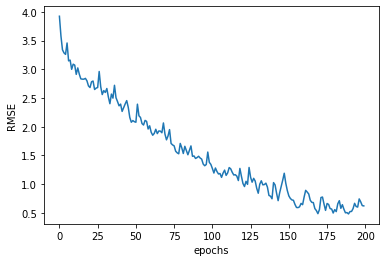

In [ ]:
sns.lineplot(data=history_df['root_mean_squared_error'])
plt.xlabel("epochs")
plt.ylabel("RMSE")

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

Text(0, 0.5, 'true sunshine hours')

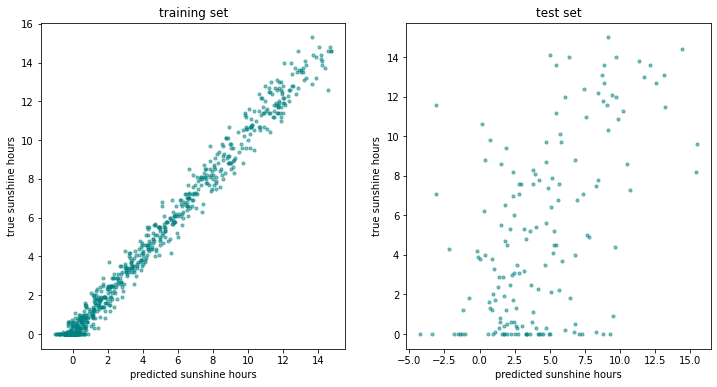

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(y_train_predict, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predict, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")


In [ ]:
loss_train, rmse_train = model.evaluate(X_train, y_train)
loss_test, rmse_test = model.evaluate(X_test, y_test)


6/6 [==============================] - 0s 3ms/step - loss: 16.8353 - root_mean_squared_error: 4.1031


In [ ]:
print("training set",rmse_train)
print("    test set",rmse_test)


training set 0.5583330392837524
    test set 4.1030802726745605


# Yikes Overfitting !

## Set expectations: How difficult is the defined problem?

Text(0, 0.5, 'true sunshine hours')

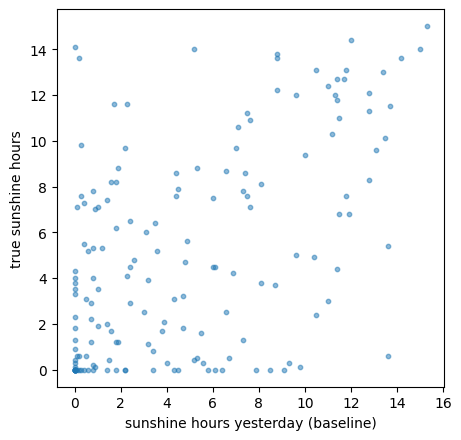

In [ ]:
y_baseline_prediction = X_test["BASEL_sunshine"]

plt.figure(figsize=(5,5), dpi=100)
plt.scatter(y_baseline_prediction, y_test, s=10, alpha=.5)
plt.xlabel("sunshine hours yesterday (baseline)")
plt.ylabel("true sunshine hours")


In [ ]:
from sklearn.metrics import mean_squared_error

rmse_nn = mean_squared_error(y_test, y_test_predict, squared=False)

rmse_baseline = mean_squared_error(y_test, y_baseline_prediction , squared=False)



In [ ]:
print("training set",rmse_nn)
print("baseline set",rmse_baseline)

training set 4.103080021327514
baseline set 4.354217739297396


In [ ]:
model = create_nn()
model.compile(optimizer='adam',
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/200
24/24 - 1s - loss: 21.9203 - root_mean_squared_error: 4.6819 - val_loss: 15.4607 - val_root_mean_squared_error: 3.9320
Epoch 2/200
24/24 - 0s - loss: 13.7890 - root_mean_squared_error: 3.7133 - val_loss: 13.8949 - val_root_mean_squared_error: 3.7276
Epoch 3/200
24/24 - 0s - loss: 13.0060 - root_mean_squared_error: 3.6064 - val_loss: 15.1075 - val_root_mean_squared_error: 3.8868
Epoch 4/200
24/24 - 0s - loss: 12.8575 - root_mean_squared_error: 3.5857 - val_loss: 13.0213 - val_root_mean_squared_error: 3.6085
Epoch 5/200
24/24 - 0s - loss: 11.3448 - root_mean_squared_error: 3.3682 - val_loss: 12.5720 - val_root_mean_squared_error: 3.5457
Epoch 6/200
24/24 - 0s - loss: 10.9544 - root_mean_squared_error: 3.3097 - val_loss: 12.6210 - val_root_mean_squared_error: 3.5526
Epoch 7/200
24/24 - 0s - loss: 10.8213 - root_mean_squared_error: 3.2896 - val_loss: 13.5167 - val_root_mean_squared_error: 3.6765
Epoch 8/200
24/24 - 0s - loss: 10.3420 - root_mean_squared_error: 3.2159 - val_loss

Text(0, 0.5, 'RMSE')

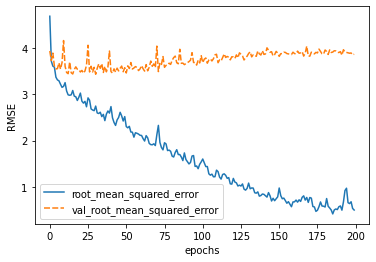

In [ ]:
history_df = pd.DataFrame.from_dict(history.history)

sns.lineplot(data=history_df[['root_mean_squared_error','val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

## Counteract model overfitting

reduce the number of parameters of our model

In [ ]:
def create_nn(nodes1, nodes2):

  inputs = keras.Input(shape=(X_data.shape[1],), name="input")

  dense1 = keras.layers.Dense(nodes1, 'relu', name="dense1")(inputs)
  dense2 = keras.layers.Dense(nodes2, 'relu', name="dense2")(dense1)

  outputs = keras.layers.Dense(1)(dense2)

  return keras.Model(inputs=inputs, outputs=outputs, name="weather_prediction_model")

In [ ]:
model = create_nn(10,5)
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 10)                1640      
_________________________________________________________________
dense2 (Dense)               (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
24/24 - 1s - loss: 31.5522 - root_mean_squared_error: 5.6171 - val_loss: 20.0554 - val_root_mean_squared_error: 4.4783
Epoch 2/200
24/24 - 0s - loss: 17.5238 - root_mean_squared_error: 4.1861 - val_loss: 18.5019 - val_root_mean_squared_error: 4.3014
Epoch 3/200
24/24 - 0s - loss: 16.0543 - root_mean_squared_error: 4.0068 - val_loss: 17.2367 - val_root_mean_squared_error: 4.1517
Epoch 4/200
24/24 - 0s - loss: 15.1044 - root_mean_squared_error: 3.8864 - val_loss: 15.5164 - val_root_mean_squared_error: 3.9391
Epoch 5/200
24/24 - 0s - loss: 13.3621 - root_mean_squared_error: 3.6554 - val_loss: 14.3889 - val_root_mean_squared_error: 3.7933
Epoch 6/200
24/24 - 0s - loss: 12.4550 - root_mean_squared_error: 3.5292 - val_loss: 13.8788 - val_root_mean_squared_error: 3.7254
Epoch 7/200
24/24 - 0s - loss: 12.0592 - root_mean_squared_error: 3.4726 - val_loss: 13.6191 - val_root_mean_squared_error: 3.6904
Epoch 8/200
24/24 - 0s - loss: 12.1335 - root_mean_squared_error: 3.4833 - val_loss

Text(0, 0.5, 'RMSE')

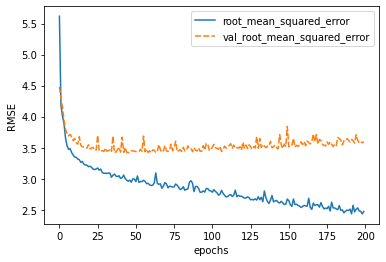

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val), 
                    verbose = 2)
                    
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")



In [ ]:
model = create_nn(100, 50)
model.compile(optimizer='adam',
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',
                          patience=10,verbose=1)

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystop],
                    verbose=2)

Epoch 1/200
24/24 - 1s - loss: 22.8787 - root_mean_squared_error: 4.7832 - val_loss: 16.5035 - val_root_mean_squared_error: 4.0625
Epoch 2/200
24/24 - 0s - loss: 14.1240 - root_mean_squared_error: 3.7582 - val_loss: 14.9786 - val_root_mean_squared_error: 3.8702
Epoch 3/200
24/24 - 0s - loss: 12.4957 - root_mean_squared_error: 3.5349 - val_loss: 12.8984 - val_root_mean_squared_error: 3.5914
Epoch 4/200
24/24 - 0s - loss: 11.1437 - root_mean_squared_error: 3.3382 - val_loss: 12.7131 - val_root_mean_squared_error: 3.5655
Epoch 5/200
24/24 - 0s - loss: 10.6083 - root_mean_squared_error: 3.2570 - val_loss: 12.6148 - val_root_mean_squared_error: 3.5517
Epoch 6/200
24/24 - 0s - loss: 10.3245 - root_mean_squared_error: 3.2132 - val_loss: 14.1370 - val_root_mean_squared_error: 3.7599
Epoch 7/200
24/24 - 0s - loss: 10.6355 - root_mean_squared_error: 3.2612 - val_loss: 12.6225 - val_root_mean_squared_error: 3.5528
Epoch 8/200
24/24 - 0s - loss: 9.7882 - root_mean_squared_error: 3.1286 - val_loss:

Text(0, 0.5, 'RMSE')

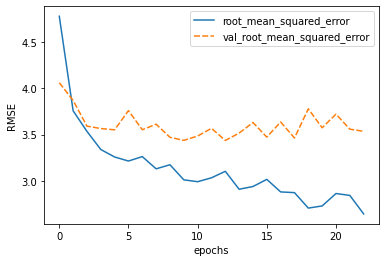

In [ ]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")


Further  techniques of interest:
- batchnormalisation
- dropout layers